In [14]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

%matplotlib inline

df = pd.read_excel('C:/Anaconda3/projects/oled/oled.xlsx', sheetname='pholed_model')
df = df[list(df.columns)[1:-1] + ['cd/A']]
df.dropna(axis=0, inplace=True)

X = df[list(df.columns)[:-1]]
y = df[['cd/A']]

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25, random_state=12)

# filename = 'adaboost_model.sav'
filename = 'pholed_rf_model.sav'

# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
print('R-squared: ', loaded_model.score(X_test, y_test))

R-squared:  0.87869391923


In [16]:
new_df = pd.read_pickle('C:/Anaconda3/projects/oled/vary LUMO/generated2.pkl')

new_X = new_df[:]

y_pred = loaded_model.predict(new_X)
y_pred = [round(float(i), 2) for i in y_pred]

new_X['cd/a'] = y_pred
# new_X.head()

triplet3 = new_X.loc[new_X['HOMO_EML'] == 5.6]
# triplet3.head(

C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


## homo eml 5.6

In [17]:
column = 'cd/a'
device50 = triplet3.loc[triplet3[column] >= 50]
device45 = triplet3.loc[(triplet3[column] >= 45) & (new_X[column] < 50)]
device40 = triplet3.loc[(triplet3[column] >= 40) & (new_X[column] < 45)]
device35 = triplet3.loc[(triplet3[column] >= 35) & (new_X[column] < 40)]
device30 = triplet3.loc[(triplet3[column] >= 30) & (new_X[column] < 35)]
device25 = triplet3.loc[(triplet3[column] >= 25) & (new_X[column] < 30)]
device20 = triplet3.loc[(triplet3[column] >= 15) & (new_X[column] < 25)]
device10 = triplet3.loc[(triplet3[column] >= 10) & (new_X[column] < 15)]
device = triplet3.loc[triplet3[column] < 10]

In [18]:
def layer(name): 
    column = name
    HTL = {'50': device50[column], '45': device45[column] , '40': device40[column] , '35': device35[column] , 
           '30': device30[column] , '25': device25[column], '15': device20[column], '10': device10[column], 
           '0': device[column]}
    sequence = ['50', '45', '40', '35', '30', '25', '15', '10', '0']
    df = pd.DataFrame(data=HTL).reindex(columns=sequence)

    # boxplot
    f, ax = plt.subplots(figsize=(12, 10))
    fig = sns.boxplot(data=df)
    plt.xticks(rotation=90,fontsize=12)
    plt.yticks(fontsize=12)
    plt.title(name, fontsize=20);
    return df.describe()

,50,45,40,35,30,25,15,10,0
count,0.0,4204.000000,20116.000000,3760.000000,42066.000000,2814.000000,0.0,0.0,0.0
mean,NaN,2.681437,2.872501,2.615346,2.849502,2.989033,NaN,NaN,NaN
std,NaN,0.287612,0.324630,0.207547,0.331926,0.220188,NaN,NaN,NaN
min,NaN,2.260000,2.260000,2.260000,2.260000,2.260000,NaN,NaN,NaN
25%,NaN,2.500000,2.700000,2.500000,2.600000,2.880000,NaN,NaN,NaN
50%,NaN,2.700000,2.800000,2.600000,2.750000,2.910000,NaN,NaN,NaN
75%,NaN,2.730000,3.000000,2.700000,3.000000,3.200000,NaN,NaN,NaN
max,NaN,3.500000,3.500000,3.500000,3.500000,3.500000,NaN,NaN,NaN


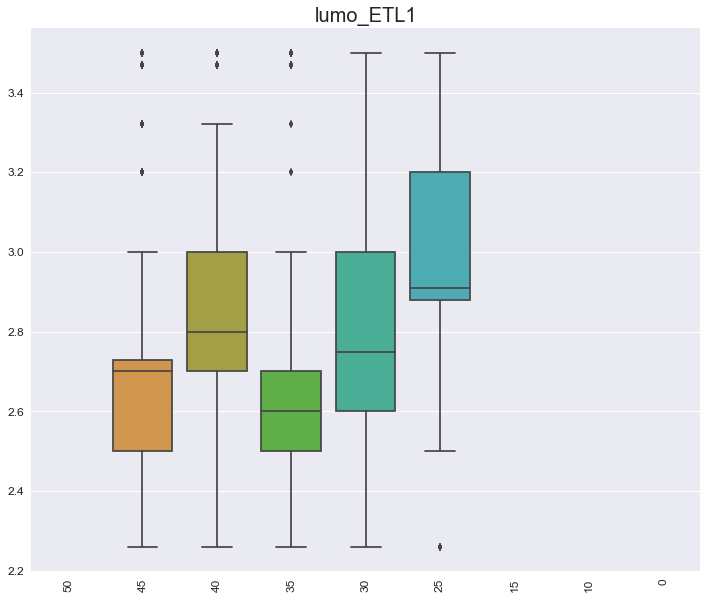

In [19]:
layer('lumo_ETL1')

,50,45,40,35,30,25,15,10,0
count,0.0,4204.000000,20116.000000,3760.00000,42066.000000,2814.000000,0.0,0.0,0.0
mean,NaN,2.458254,2.448275,2.60734,2.444473,2.322388,NaN,NaN,NaN
std,NaN,0.454780,0.462266,0.45979,0.459819,0.424620,NaN,NaN,NaN
min,NaN,1.700000,1.700000,1.70000,1.700000,1.700000,NaN,NaN,NaN
25%,NaN,2.100000,2.000000,2.30000,2.000000,1.900000,NaN,NaN,NaN
50%,NaN,2.400000,2.500000,2.60000,2.400000,2.250000,NaN,NaN,NaN
75%,NaN,2.900000,2.800000,3.00000,2.800000,2.700000,NaN,NaN,NaN
max,NaN,3.200000,3.200000,3.20000,3.200000,3.200000,NaN,NaN,NaN


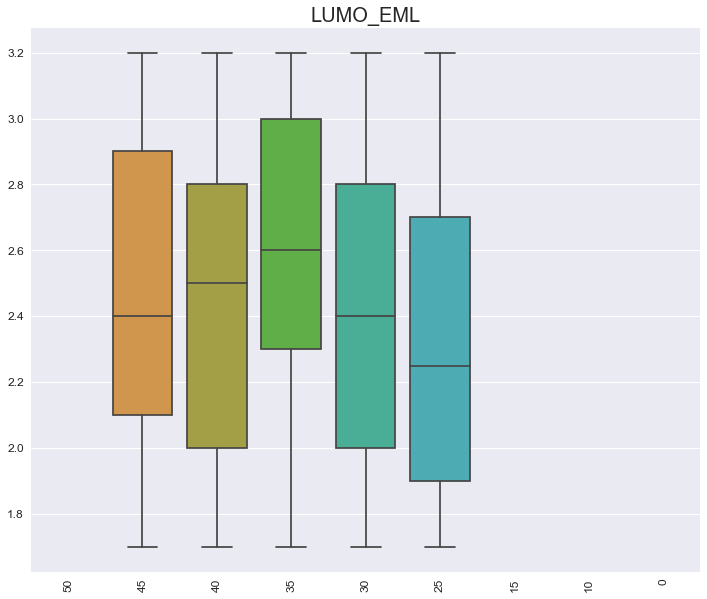

In [20]:
layer('LUMO_EML')

## homo eml 5.8

In [21]:
triplet3 = new_X.loc[new_X['HOMO_EML'] == 5.8]

column = 'cd/a'
device50 = triplet3.loc[triplet3[column] >= 50]
device45 = triplet3.loc[(triplet3[column] >= 45) & (new_X[column] < 50)]
device40 = triplet3.loc[(triplet3[column] >= 40) & (new_X[column] < 45)]
device35 = triplet3.loc[(triplet3[column] >= 35) & (new_X[column] < 40)]
device30 = triplet3.loc[(triplet3[column] >= 30) & (new_X[column] < 35)]
device25 = triplet3.loc[(triplet3[column] >= 25) & (new_X[column] < 30)]
device20 = triplet3.loc[(triplet3[column] >= 15) & (new_X[column] < 25)]
device10 = triplet3.loc[(triplet3[column] >= 10) & (new_X[column] < 15)]
device = triplet3.loc[triplet3[column] < 10]

,50,45,40,35,30,25,15,10,0
count,0.0,3382.000000,20938.000000,1223.000000,43134.000000,4283.000000,0.0,0.0,0.0
mean,NaN,2.648596,2.870305,2.574816,2.832952,2.980728,NaN,NaN,NaN
std,NaN,0.264722,0.325213,0.212221,0.331244,0.230849,NaN,NaN,NaN
min,NaN,2.260000,2.260000,2.260000,2.260000,2.260000,NaN,NaN,NaN
25%,NaN,2.500000,2.700000,2.500000,2.600000,2.880000,NaN,NaN,NaN
50%,NaN,2.600000,2.800000,2.520000,2.750000,2.910000,NaN,NaN,NaN
75%,NaN,2.730000,3.000000,2.700000,3.000000,3.200000,NaN,NaN,NaN
max,NaN,3.500000,3.500000,3.500000,3.500000,3.500000,NaN,NaN,NaN


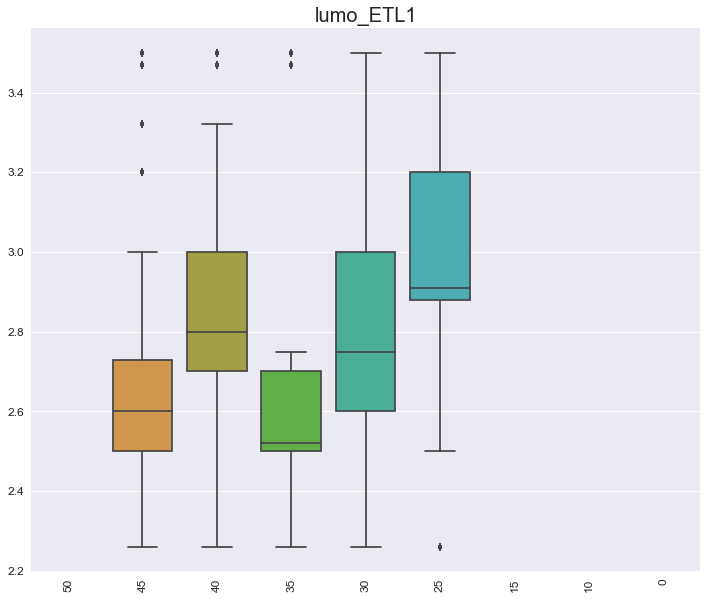

In [22]:
layer('lumo_ETL1')

,50,45,40,35,30,25,15,10,0
count,0.0,3382.000000,20938.000000,1223.000000,43134.000000,4283.000000,0.0,0.0,0.0
mean,NaN,2.392519,2.459285,2.671954,2.458049,2.305557,NaN,NaN,NaN
std,NaN,0.437377,0.464030,0.421738,0.460060,0.442095,NaN,NaN,NaN
min,NaN,1.700000,1.700000,1.700000,1.700000,1.700000,NaN,NaN,NaN
25%,NaN,2.100000,2.000000,2.300000,2.100000,1.900000,NaN,NaN,NaN
50%,NaN,2.300000,2.500000,2.700000,2.500000,2.200000,NaN,NaN,NaN
75%,NaN,2.800000,2.900000,3.100000,2.900000,2.700000,NaN,NaN,NaN
max,NaN,3.200000,3.200000,3.200000,3.200000,3.200000,NaN,NaN,NaN


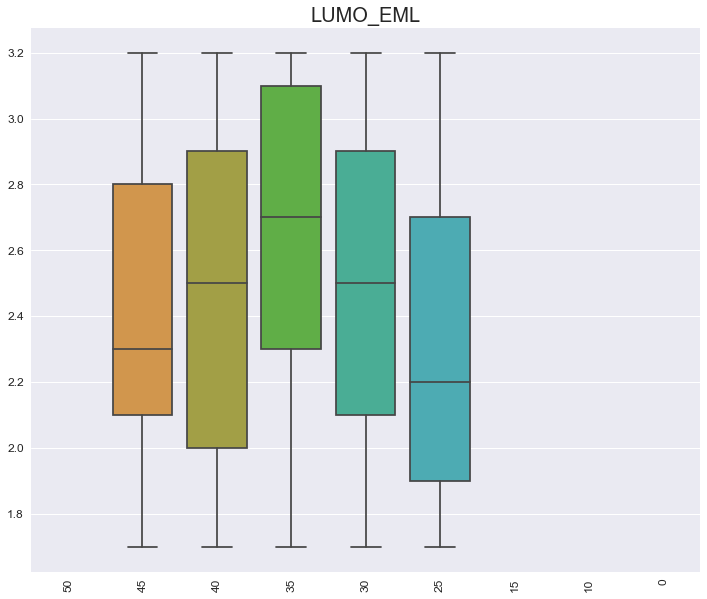

In [23]:
layer('LUMO_EML')

## homo eml 6.0

In [24]:
triplet3 = new_X.loc[new_X['HOMO_EML'] == 6.0]

column = 'cd/a'
device50 = triplet3.loc[triplet3[column] >= 50]
device45 = triplet3.loc[(triplet3[column] >= 45) & (new_X[column] < 50)]
device40 = triplet3.loc[(triplet3[column] >= 40) & (new_X[column] < 45)]
device35 = triplet3.loc[(triplet3[column] >= 35) & (new_X[column] < 40)]
device30 = triplet3.loc[(triplet3[column] >= 30) & (new_X[column] < 35)]
device25 = triplet3.loc[(triplet3[column] >= 25) & (new_X[column] < 30)]
device20 = triplet3.loc[(triplet3[column] >= 15) & (new_X[column] < 25)]
device10 = triplet3.loc[(triplet3[column] >= 10) & (new_X[column] < 15)]
device = triplet3.loc[triplet3[column] < 10]

,50,45,40,35,30,25,15,10,0
count,0.0,4181.000000,20139.000000,281.000000,41760.000000,6599.000000,0.0,0.0,0.0
mean,NaN,2.651473,2.878504,2.531281,2.820386,2.973387,NaN,NaN,NaN
std,NaN,0.274253,0.323046,0.130681,0.333899,0.236219,NaN,NaN,NaN
min,NaN,2.260000,2.260000,2.260000,2.260000,2.260000,NaN,NaN,NaN
25%,NaN,2.500000,2.700000,2.500000,2.600000,2.800000,NaN,NaN,NaN
50%,NaN,2.600000,2.800000,2.520000,2.730000,2.910000,NaN,NaN,NaN
75%,NaN,2.730000,3.000000,2.600000,2.910000,3.200000,NaN,NaN,NaN
max,NaN,3.500000,3.500000,2.750000,3.500000,3.500000,NaN,NaN,NaN


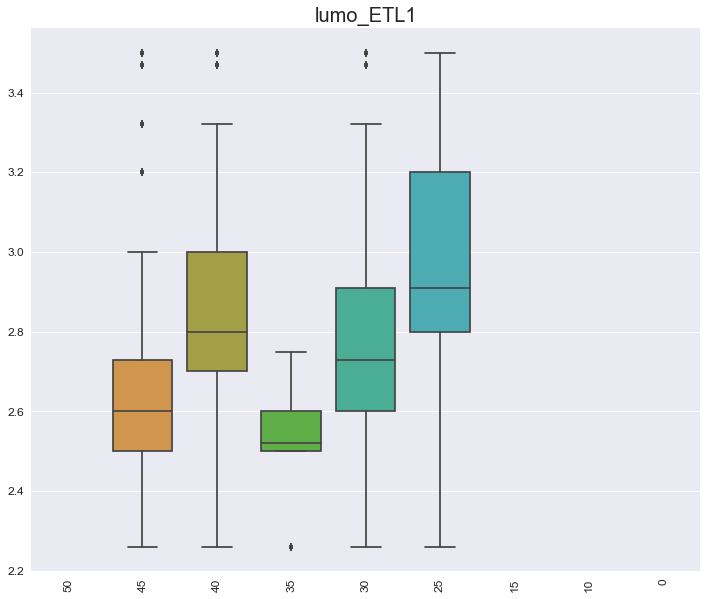

In [25]:
layer('lumo_ETL1')

,50,45,40,35,30,25,15,10,0
count,0.0,4181.000000,20139.000000,281.000000,41760.000000,6599.000000,0.0,0.0,0.0
mean,NaN,2.402177,2.459928,2.456940,2.463712,2.362934,NaN,NaN,NaN
std,NaN,0.428492,0.466846,0.368825,0.461324,0.452820,NaN,NaN,NaN
min,NaN,1.700000,1.700000,1.700000,1.700000,1.700000,NaN,NaN,NaN
25%,NaN,2.100000,2.000000,2.200000,2.100000,1.900000,NaN,NaN,NaN
50%,NaN,2.300000,2.500000,2.300000,2.500000,2.400000,NaN,NaN,NaN
75%,NaN,2.800000,2.900000,2.600000,2.900000,2.800000,NaN,NaN,NaN
max,NaN,3.200000,3.200000,3.200000,3.200000,3.200000,NaN,NaN,NaN


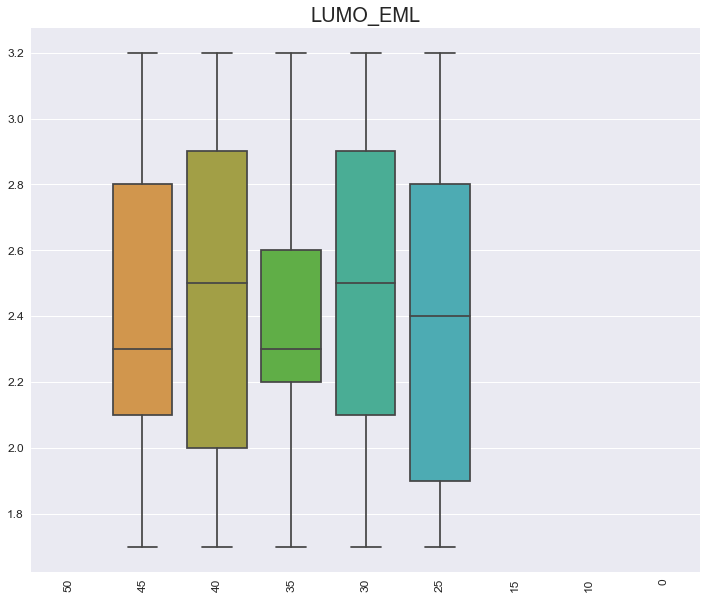

In [26]:
layer('LUMO_EML')